In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import us

In [31]:
colnames = ["date", "city", "state", "country", "shape",
          "duration_seconds", "duration_reported", "description",
          "report_date", "latitude", "longitude"]
ufo = pd.read_csv('/home/hbgrob/work/data-readonly/ufo-scrubbed-geocoded-time-standardized.csv', names = colnames, 
                  parse_dates=['date', 'report_date'])


In [32]:
'''We may use this later, but I wanted to keep it in here. This is the graph that looks like the US:'''


#From Class
#Also a test to make sure I have an idea what I'm doing
#coming back to this, I'm not sure if we need/want this
#geometries = [state.geometry for state in all_states]
#fig = plt.figure()
#ax = fig.add_subplot(111,projection = cartopy.crs.LambertConformal())
#ax.set_extent([-125,-66.5,20,50], cartopy.crs.Geodetic())
#ax.add_geometries(geometries, crs=cartopy.crs.PlateCarree(), edgecolors='k')



'We may use this later, but I wanted to keep it in here. This is the graph that looks like the US:'

In [36]:
booze = pd.read_csv('cleaned_alcohol_data_abbr.csv')
booze.head()

,State or geographic area,Year,Beer,Wine,Spirits,All beverages,U.S. decile for all beverages
0,AL,2015,1.12,0.25,0.64,2.00,9.0
1,AL,2014,1.13,0.25,0.62,1.99,9.0
2,AL,2013,1.14,0.25,0.60,1.99,9.0
3,AL,2012,1.16,0.24,0.60,2.00,9.0
4,AL,2011,1.14,0.24,0.59,1.97,9.0


In [84]:
#data from https://www2.census.gov/library/publications/2006/compendia/smadb06/tableA/all-tabA.pdf
pop_cols = ['state', 'Total', 'Under 5 years','5 to 17 years', '18 to 24 years', '25 to 34 year','35 to 44 years',
            '45 to 54 years','55 to 64 years','65 to 74 years','75 to 84 years', '85 years and over','Total Population Over 18']
populations = pd.read_csv('Population.csv', names=pop_cols)

In [85]:
populations.head()

,state,Total,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 year,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Total Population Over 18
0,United States,"293,655","20,071","53,207","29,245","40,032","44,109","41,619","29,079","18,463","12,971","4,860","220,377,406"
1,Alabama,"4,530",296,798,456,603,651,648,480,325,207,66,"3,435,649"
2,Alaska,655,50,138,74,81,102,107,61,26,13,4,"467,206"
3,Arizona,"5,744",450,"1,097",571,830,800,719,545,396,250,86,"4,196,574"
4,Arkansas,"2,753",186,491,280,360,385,376,294,205,128,48,"2,076,079"


<b>Data Cleaning</b>

In [62]:
#print('max is:' + str(ufo['report_date'].max()) + '. Min is:' + str(ufo['report_date'].min()))
#'''since we have a range of 1998-2014, I think we should remove the data entries that are outside that range'''

'since we have a range of 1998-2014, I think we should remove the data entries that are outside that range'

In [61]:
'''this removes all the non-US cities from the dataset'''

ufo['country'].map(lambda x: x == 'us')
#some intense black magic here
ufo_us = ufo[ufo['country'].map(lambda x: x == 'us')]
ufo_us['state'] = ufo_us['state'].apply(lambda x: x.upper())
ufo_us.head()

,date,city,state,country,shape,duration_seconds,duration_reported,description,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,TX,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
3,1956-10-10 21:00:00,edna,TX,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,HI,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
5,1961-10-10 19:00:00,bristol,TN,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889
7,1965-10-10 23:45:00,norwalk,CT,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.117500,-73.408333


In [86]:
ufo_dateMax = ufo['report_date'].max()
ufo_dateMin = ufo['report_date'].min()

print('the max is:' + str(ufo_dateMax.year) + ' the min is: ' + str(ufo_dateMin.year))

#booze.head()

booze_updatedYears = booze[booze['Year'].map(lambda x: x >= ufo_dateMin.year and x <= ufo_dateMax.year)]
#booze_updatedYears = booze['Year'].map(lambda x: x >= ufo_dateMin.year and x <= ufo_dateMax.year)

the max is:2014 the min is: 1998


In [50]:
booze = booze_updatedYears
ufo = ufo_us

In [73]:
states = ufo.groupby('state')
len(states)

52

<b> End Data Cleaning </b>

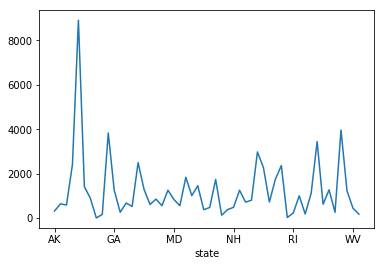

In [55]:
ufo_state_count=ufo.groupby('state')['city'].count()
ufo_state_count.plot()

In [74]:
len(booze.groupby('State or geographic area'))

51

In [56]:
booze.groupby('State or geographic area').mean()

,Year,Beer,Wine,Spirits,All beverages,U.S. decile for all beverages
State or geographic area,,,,,,
AK,2006,1.251176,0.458235,1.048235,2.759412,2.117647
AL,2006,1.175882,0.210000,0.552353,1.937647,9.000000
AR,2006,1.040000,0.158235,0.547647,1.748235,10.000000
AZ,2006,1.326471,0.375882,0.750588,2.452353,3.882353
CA,2006,1.035294,0.535294,0.681765,2.252941,6.235294
CO,2006,1.278235,0.441765,0.971176,2.690588,2.235294
CT,2006,0.908824,0.552941,0.820000,2.282353,5.764706
DC,2006,1.305294,0.924706,1.564706,3.795294,1.000000
DE,2006,1.358235,0.590588,1.281765,3.228235,1.000000


In [57]:
#If we can get a year for when the 
beer = booze.groupby('State or geographic area')['Beer'].mean()
wine = booze.groupby('State or geographic area')['Wine'].mean()
spirits = booze.groupby('State or geographic area')['Spirits'].mean()
allBooze = booze.groupby('State or geographic area')['All beverages'].mean()

pandas.core.series.Series

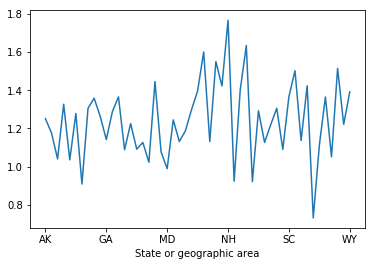

In [58]:
beer.plot()
type(beer)

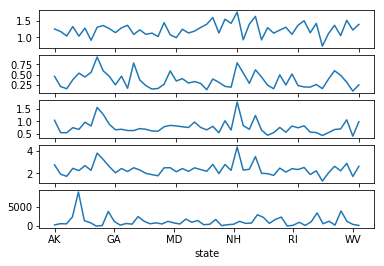

In [59]:
#Here, I was thinking we could do something like have a group of plots, one for beer, wine, spirits and total booze
ax1 = plt.subplot(511)
beer.plot()
ax2 = plt.subplot(512)#2,3,2)
wine.plot()
ax3 = plt.subplot(513)#2,3,3)
spirits.plot()
ax4 = plt.subplot(514)#2,3,4)
allBooze.plot()
ax5 = plt.subplot(515)
ufo_state_count.plot()


In [16]:
booze_updatedYears.head()

,State or geographic area,Year,Beer,Wine,Spirits,All beverages,U.S. decile for all beverages
1,AL,2014,1.13,0.25,0.62,1.99,9.0
2,AL,2013,1.14,0.25,0.60,1.99,9.0
3,AL,2012,1.16,0.24,0.60,2.00,9.0
4,AL,2011,1.14,0.24,0.59,1.97,9.0
5,AL,2010,1.16,0.23,0.58,1.97,9.0


In [81]:
ufo_USstate_count=ufo_us.groupby('state')['city'].count()
ufo_USstate_count #total ufo sightings

state
AK     319
AL     642
AR     588
AZ    2414
CA    8912
CO    1413
CT     892
DC       7
DE     166
FL    3835
GA    1255
HI     262
IA     678
ID     521
IL    2499
IN    1288
KS     613
KY     855
LA     558
MA    1256
MD     837
ME     558
MI    1836
MN    1012
MO    1458
MS     375
MT     478
NC    1740
ND     129
NE     381
NH     486
NJ    1255
NM     720
NV     803
NY    2980
OH    2275
OK     724
OR    1747
PA    2366
PR      25
RI     228
SC    1003
SD     183
TN    1119
TX    3447
UT     622
VA    1273
VT     260
WA    3966
WI    1232
WV     448
WY     175
Name: city, dtype: int64

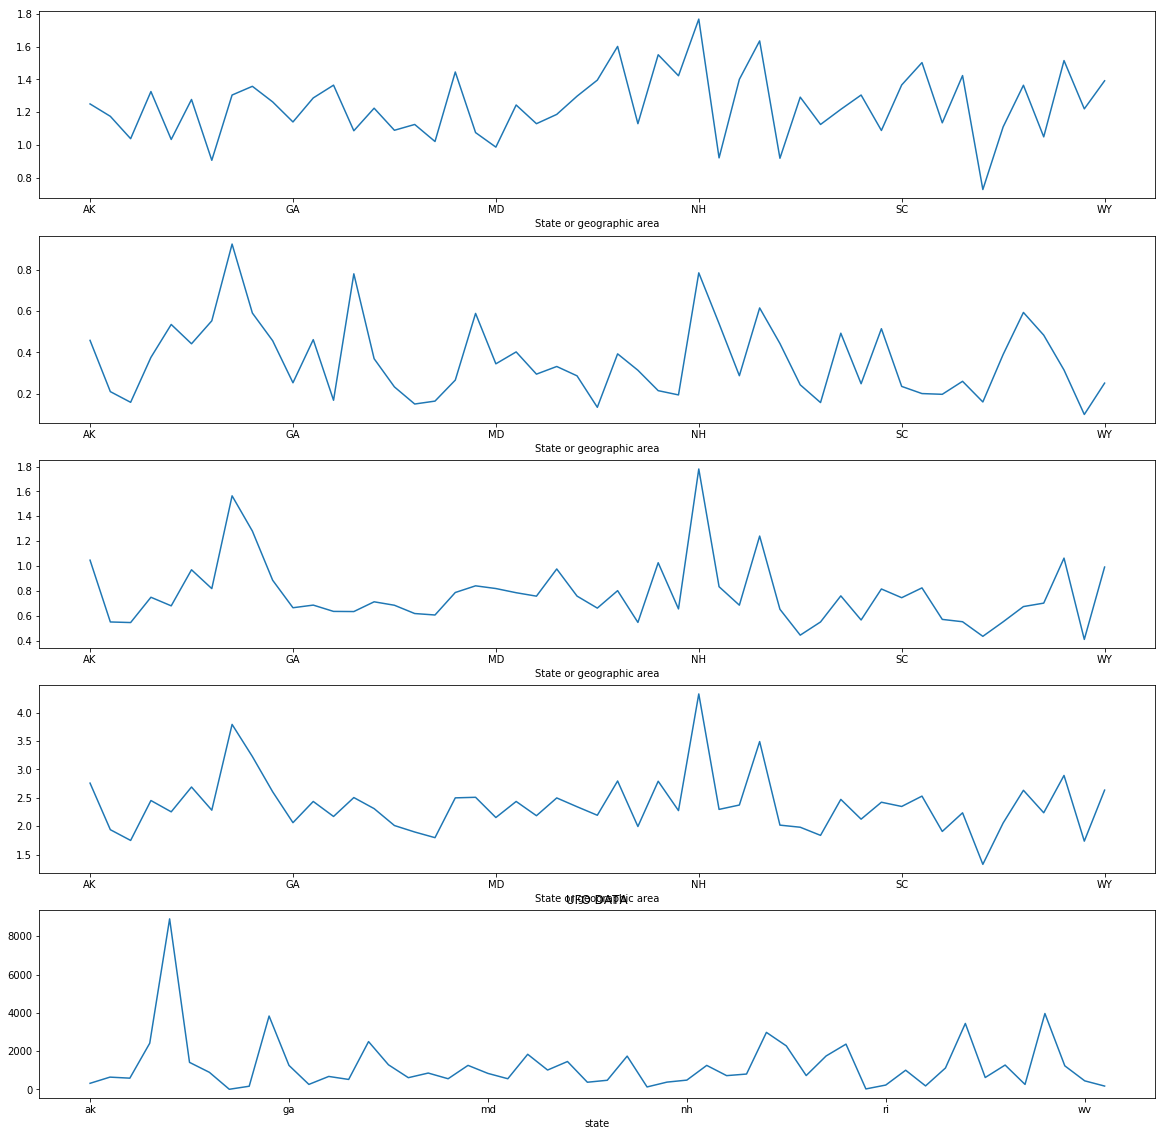

In [18]:
#Here, I was thinking we could do something like have a group of plots, one for beer, wine, spirits and total booze
fig = plt.figure(figsize=(20, 20)) #*********THIS IS IMPORTANT SO YOU CAN SEE IT
ax1 = plt.subplot(511)
beer.plot()
ax2 = plt.subplot(512)#2,3,2)
wine.plot()
ax3 = plt.subplot(513)#2,3,3)
spirits.plot()
ax4 = plt.subplot(514)#2,3,4)
allBooze.plot()
ax5 = plt.subplot(515)
ufo_USstate_count.plot()
ax5.set_title('UFO DATA')
plt.show()
#I really hate how the 'UFO DATA' is covered up by the other graph, but maybe that's just me

Ok, the next thing will have to be using some sort of normalizing factor so that the data all lines up. <br></br>
The only thing is what are we going to use as a normalizing factor.

In [75]:
import us

In [79]:
us?

In [80]:
us.states.mapping('name','abbr')

{'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Dakota': 'DK',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Orleans': 'OL',
 'Pennsylvania': 'PA',
 'Philippine Islands': 'PI',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tenne